# Import libraries and Load the dataset for analyzing

In [14]:
# importing required libraries to analyze data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('seaborn version : ', sns.__version__)

pandas version :  2.1.4
numpy version :  1.26.4
seaborn version :  0.13.2


# Read an Excel file into a pandas DataFrame.

In [15]:
df = pd.read_excel("1688640705_hr_comma_sep.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 1.	Perform data quality check by checking for missing values if any.

In [17]:
df.isna().values.any()

False

In [18]:
# Rename sales to dept since its confusing
df = df.rename(columns={'sales': 'dept'})

### <font color='green'>Above query response indicates that there are no missing values in the data. Hence no action required .</font>

# 2.	Understand what factors contributed most to employee turnover by EDA.

### 2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

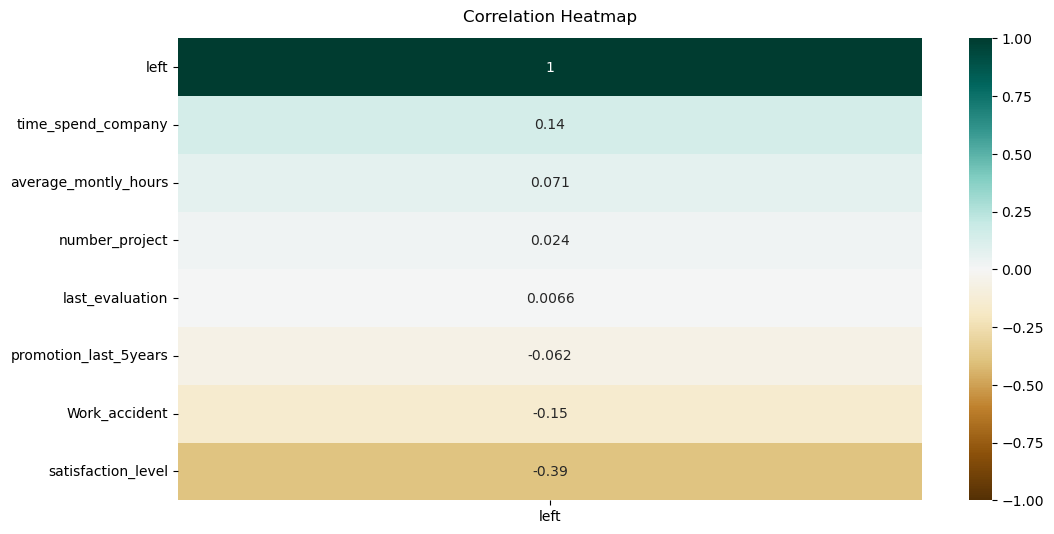

In [19]:
# corr = df.corr(numeric_only=True)

## Visualize the corr using heatMap
plt.figure(figsize=(12, 6))
# sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap = sns.heatmap(df.corr(numeric_only=True)[['left']].sort_values(by='left', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

### Inferences

* Employee who spent more average monthly hours has the high risk of turning over (Positive Linear Correlation)
* Employee who has the less satisfication level will also the high risk of turning over (Negative Linear Correlation)
* Employee who worked on multiple projects has the less risk of turning over (Positive Linear Correlation)
* Employee who did last evaluation did not have much risk of turning over (No Correlation)


### 2.2.a Draw the distribution plot of Employee Satisfaction (use column satisfaction_level)

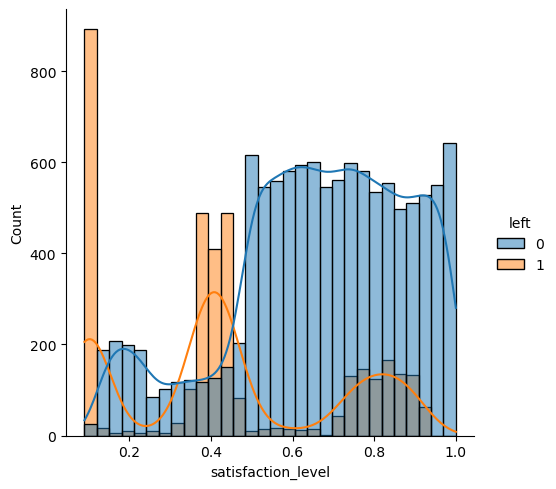

In [20]:
sns.displot(data=df, x='satisfaction_level', kde=True, hue='left')
plt.show()

### Inferences

* Employees with satisfication level decrease below 0.2, there is a considerable increase of employee turn over.
* Employees with satisfication level more than 0.5 got a considerable descrease of employee turn over.
* Employees with satisfication level between 0.2 and 0.5 got huge employee turn over.

### 2.2.b Draw the distribution plot of Employee Evaluation (use column last_evaluation)

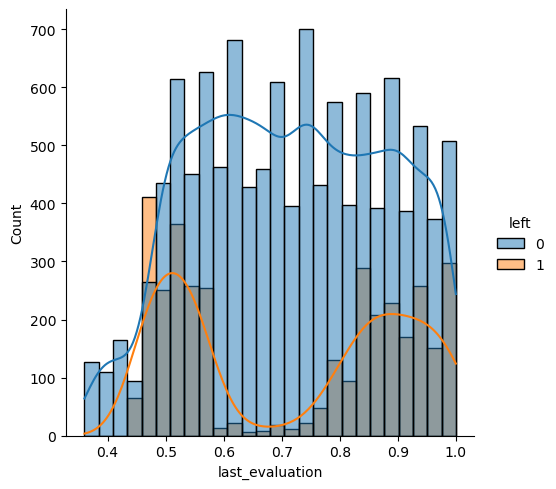

In [21]:
sns.displot(data=df, x='last_evaluation', kde=True, hue='left')
plt.show()

### Inferences

* Employees who's last evaluation rating was higher seems to be more satisfication in work which got less risk in turn over

### 2.2.c Draw the distribution plot of Employee Average Monthly Hours (use column average_montly_hours)

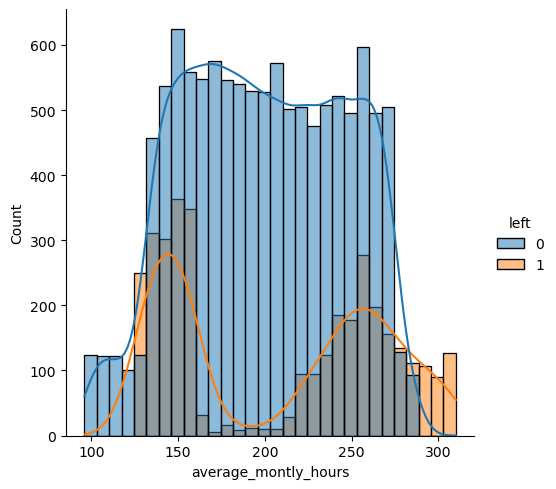

In [22]:
sns.displot(data=df, x='average_montly_hours', kde=True, hue='left')
plt.show()

### Inferences

* Employees who spend more average monthly hours has the high risk of turn over
* Employees who spend less average monthly hours has the high risk of turn over . Got good work life balance !!!

### 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

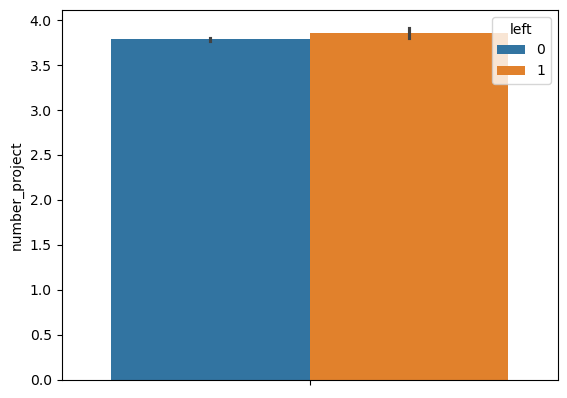

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.786664,0.979884,2.0,3.0,4.0,4.0,6.0
1,3571.0,3.855503,1.818165,2.0,2.0,4.0,6.0,7.0


In [23]:
sns.barplot(df, y="number_project", hue="left")
plt.show()
df['number_project'].groupby(df.left).describe()

### Inferences

* Employees who left worked on average of 3.78664 projects
* Employees who stayed worked on average of 3.8 projects
* Number of projects does not have any significant impact on the employees turn over 

# 3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

### 3.1.	Choose columns satisfaction_level, last_evaluation and left.

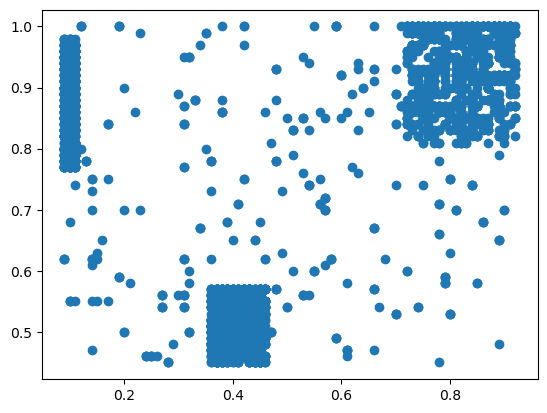

In [24]:
## create the dataset for employees who left the company
df_left = df[df.left == 1]

## Visualize using these columns satisfaction_level, last_evaluation without clustering
plt.scatter(df_left.satisfaction_level, df_left.last_evaluation)
plt.show()

### 3.2. Do KMeans clustering of employees who left the company into 3 clusters.

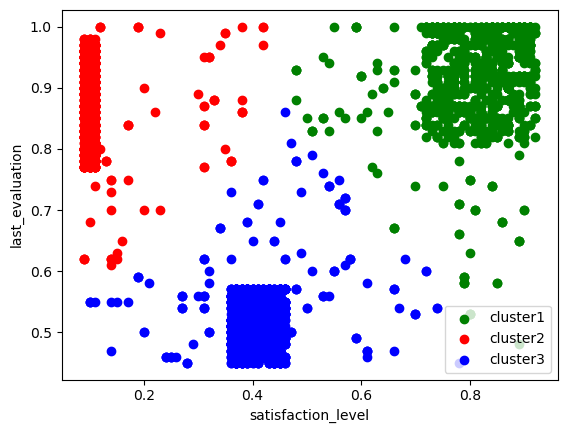

In [25]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
df_kmeans = df_left.filter(['satisfaction_level','last_evaluation'], axis=1)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans['cluster'] = clusters

df1 = df_kmeans[df_kmeans.cluster == 0]
df2 = df_kmeans[df_kmeans.cluster == 1]
df3 = df_kmeans[df_kmeans.cluster == 2]

plt.scatter(df1.satisfaction_level, df1.last_evaluation, color="green", label="cluster1")
plt.scatter(df2.satisfaction_level, df2.last_evaluation, color="red", label="cluster2")
plt.scatter(df3.satisfaction_level, df3.last_evaluation, color="blue", label="cluster3")
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()

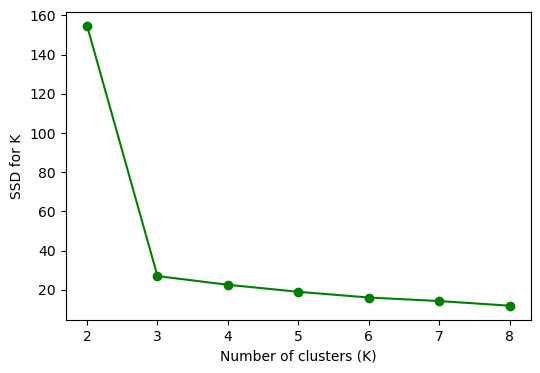

In [26]:
## we can use the elbow technique to identify N Clusters which suits it well

ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit_predict(df_left.filter(['satisfaction_level','last_evaluation'], axis=1))
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

### 3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

### Inferences

* Employees who have more satisfication level and evaluation also got more high turn over 
* Employees who have average satisfication level and evaluation also got little turn over 

# 4. Handle the left Class Imbalance using SMOTE technique.

### 4.1. Pre-Process the data by converting categorical columns to numerical columns by
* Separating categorical variables and numeric variables.
* Applying get_dummies() to the categorical variables.
* Combining categorical variables and numeric variables.

In [27]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Rename the columns to be more meaningful
df = df.rename(columns={'sales': 'dept', 'salary': 'salary_range'})

# Separating categorical variables and numeric variables.
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Applying get_dummies() to the categorical variables.
dummies1 = pd.get_dummies(df.dept, dtype="int")
dummies2 = pd.get_dummies(df.salary_range, dtype="int")

# Concatenate the encoded categorical columns
df_encoded = pd.concat([df, dummies1, dummies2], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [28]:
from sklearn.model_selection import train_test_split

y = df_encoded.left
X = df_encoded.drop(['left'], axis=1)
# print(X.left)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())
# print(X_test.left.value_counts())

left
0    9142
1    2857
Name: count, dtype: int64
left
0    2286
1     714
Name: count, dtype: int64


# Inferences

* Using stratify we can make sure proportion of the data remains consistent across train and test for the target variable

### 4.3. Upsample the train dataset using SMOTE technique from the imblearn module.

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

print("Upsampled data ....")
print(y_sm.value_counts())

Upsampled data ....
left
1    11428
0    11428
Name: count, dtype: int64


# Inferences

* Now we can see the upsample data based on the target variable

# 5. Perform 5-Fold cross-validation model training and evaluate performance. 

### 5.1. Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection

# predicted
lf = LogisticRegression()
predicted_lr = model_selection.cross_val_predict(lf, X_sm, y_sm, cv=5)
print(metrics.accuracy_score(y_sm, predicted_lr))

0.782201610080504


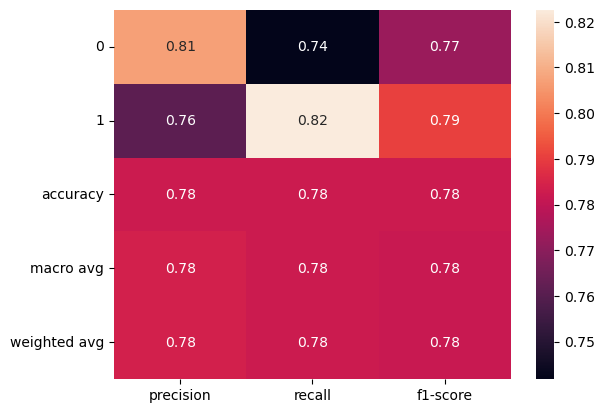

In [31]:
# print the classification report
clf_report_lr = metrics.classification_report(y_sm, predicted_lr, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_lr).iloc[:-1, :].T, annot=True)
plt.show()

### 5.2. Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [32]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics, model_selection

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
# predicted
predicted_rf = model_selection.cross_val_predict(rf, X_sm, y_sm, cv=5)
print(metrics.accuracy_score(y_sm, predicted_rf))

0.9845554777738887


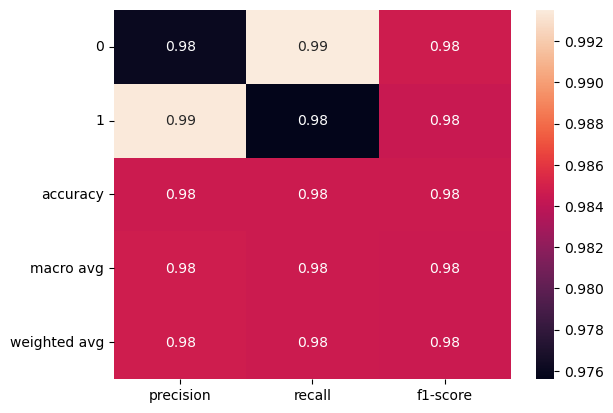

In [33]:
# print the classification report
clf_report_rf = metrics.classification_report(y_sm, predicted_rf, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_rf).iloc[:-1, :].T, annot=True)
plt.show()

### 5.3. Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# predicted
predicted_gbc = model_selection.cross_val_predict(gbc, X_sm, y_sm, cv=5)
print(metrics.accuracy_score(y_sm, predicted_gbc))

0.956291564578229


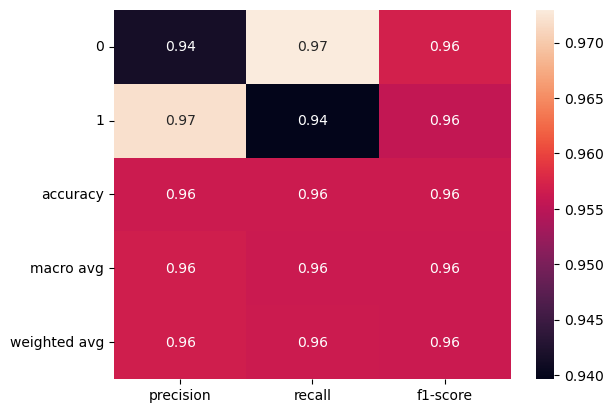

In [35]:
# print the classification report
clf_report_gbc = metrics.classification_report(y_sm, predicted_gbc, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_gbc).iloc[:-1, :].T, annot=True)
plt.show()

# 6. Identify the best model and justify the evaluation metrics used. 

### 6.1. Find the ROC/AUC for each model and plot the ROC curve.

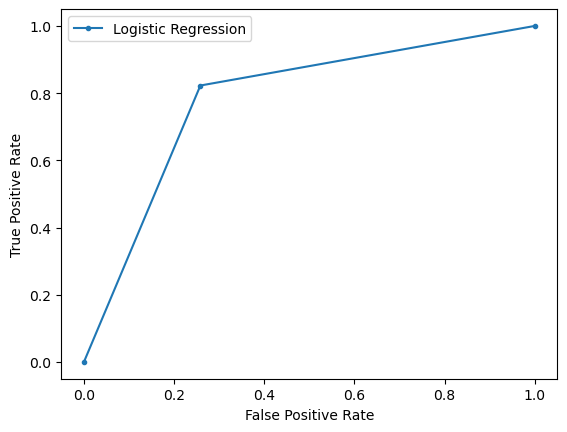

In [36]:
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_sm, predicted_lr)

# calculate AUC
# auc = metrics.roc_auc_score(y, probs)
# print('AUC: %.3f' % auc)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

rf_fpr [0.         0.00647532 1.        ]
rf_tpr [0.         0.97558628 1.        ]
thresholds [2 1 0]


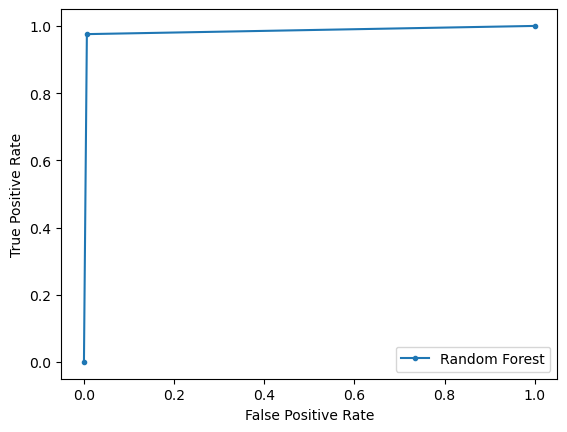

In [37]:
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_sm, predicted_rf)

print('rf_fpr' , rf_fpr)
print('rf_tpr' , rf_tpr)
print('thresholds' , thresholds)
# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 6.2. Find the confusion matrix for each of the models.

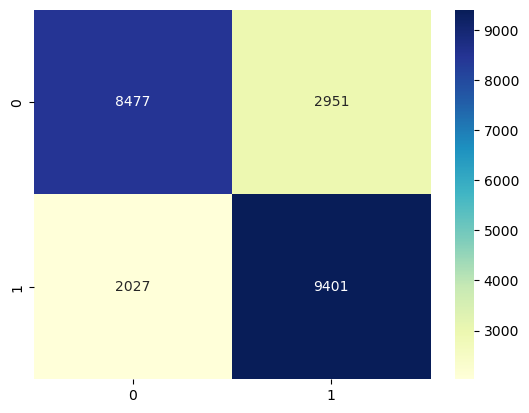

In [38]:
# Logistic Regression - Get the confusion matrix

cf_matrix = metrics.confusion_matrix(y_sm, predicted_lr)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

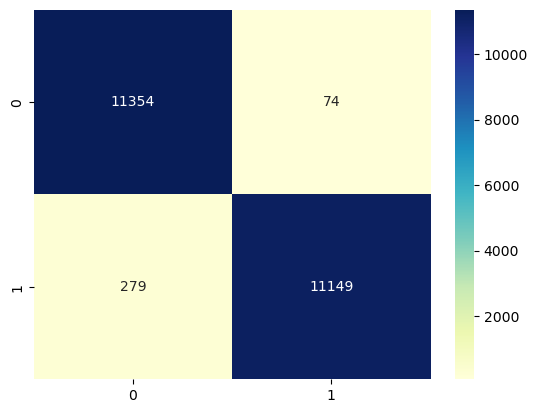

In [39]:
# Random Forest - Get the confusion matrix

cf_matrix = metrics.confusion_matrix(y_sm, predicted_rf)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

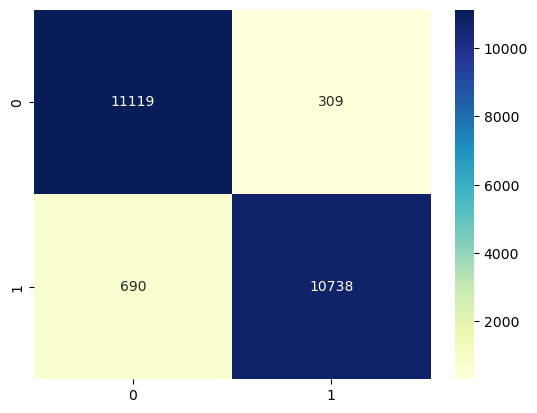

In [40]:
# GradientBoostingClassifier - Get the confusion matrix

cf_matrix = metrics.confusion_matrix(y_sm, predicted_gbc)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

### 6.3. From the confusion matrix, explain which metric needs to be used- Recall or Precision?

# Inference 

* With respect to the turnover predict, we need to predict turnover 
* we may need to use the Recall since we need to find the turnover 

# 7. Suggest various retention strategies for targeted employees.

### 7.1. Using the best model, predict the probability of employee turnover in the test data.

### 7.2  Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
■	Safe Zone (Green) (Score < 20%)
■	Low Risk Zone (Yellow) (20% < Score < 60%)
■	Medium Risk Zone (Orange) (60% < Score < 90%)
■	High Risk Zone (Red) (Score > 90%).
